# 패키지 불러오기

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv('machine.csv')
df

,Process_Type,Datetime,Code_Num,Z1_Temp,Z1_OP1,ST,Tube_Furnace1_OP,Tube_Furnace2_OP,Tube_Furnace3_OP,Tube_Furnace4_OP,Tube_Furnace_CP,Tube_Furnace1_Temp,Tube_Furnace2_Temp,Tube_Furnace3_Temp,Tube_Furnace4_Temp
0,OP-A,2022-01-03 11:22,GroupA,NaN,75.6648,NaN,73.527404,59.989422,52.249481,72.134908,0.450497,NaN,868.759544,NaN,NaN
1,OP-A,2022-01-03 11:22,GroupA,NaN,75.6706,NaN,79.149174,62.027232,50.617109,71.245235,0.457370,878.116929,883.821264,890.740760,894.430606
2,OP-A,2022-01-03 11:22,GroupA,99.614201,75.6776,68.724636,78.946336,62.235532,52.218350,72.705558,0.454914,866.441979,882.850031,864.373065,893.530501
3,OP-A,2022-01-03 11:22,GroupA,99.376221,75.8656,69.161116,78.445719,61.608260,52.863552,73.975640,0.456540,876.350472,906.208463,891.107865,896.347636
4,OP-C,2022-01-03 11:22,GroupA,99.809053,73.6468,69.181098,76.673808,61.589311,52.297196,71.887865,0.460100,903.587678,867.215131,893.206883,871.594283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231118,OP-C,2022-01-15 19:49,GroupD,100.202264,73.5343,68.405244,84.369599,43.864803,52.731835,71.606995,0.453212,875.288592,895.764797,869.150410,892.129335
231119,OP-C,2022-01-15 19:49,GroupD,100.219542,73.5343,68.526229,85.214740,43.807730,52.788213,71.634139,0.451906,881.480945,888.820207,876.529220,884.019949
231120,OP-C,2022-01-15 19:49,GroupD,101.141937,73.4839,68.877919,86.438976,44.946023,53.315676,72.529658,0.455600,868.731699,863.224662,883.589334,899.204662
231121,OP-C,2022-01-15 19:49,GroupD,100.397590,73.4839,69.092723,86.214394,43.979252,53.533784,71.268777,0.452067,861.692367,905.774959,860.538841,902.815192


# 결측치 확인

In [3]:
df.isnull().sum()

Process_Type            0
Datetime                0
Code_Num                0
Z1_Temp                25
Z1_OP1                  0
ST                     25
Tube_Furnace1_OP      254
Tube_Furnace2_OP        0
Tube_Furnace3_OP        0
Tube_Furnace4_OP        0
Tube_Furnace_CP         0
Tube_Furnace1_Temp      5
Tube_Furnace2_Temp     10
Tube_Furnace3_Temp      9
Tube_Furnace4_Temp     15
dtype: int64

# 결측치 제거

In [4]:
df = df.dropna()
df = df.reset_index(drop = True)

# 종속변수 Y 만들기(3시그마)

In [5]:
df_nu = df[['Z1_Temp', 'Z1_OP1', 'ST',
       'Tube_Furnace1_OP', 'Tube_Furnace2_OP', 'Tube_Furnace3_OP',
       'Tube_Furnace4_OP', 'Tube_Furnace_CP', 'Tube_Furnace1_Temp',
       'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp', 'Tube_Furnace4_Temp']]
df_ca = df[['Process_Type', 'Datetime', 'Code_Num']]

columns = [col for col in df_nu.columns]
for col in columns:
    mean_1 = df_nu[col].mean()
    std_1 = (df_nu[col].std()) * 3
    df_nu[f'{col}_new'] = 0
    df_nu.loc[(df_nu[col]  > mean_1 + std_1) | (df_nu[col]  < mean_1 - std_1),f'{col}_new' ] = 1

df_nu['Y'] = df_nu['Z1_Temp_new'] + df_nu['Z1_OP1_new'] + df_nu['ST_new'] + df_nu['Tube_Furnace1_OP_new'] + df_nu['Tube_Furnace2_OP_new'] + \
             df_nu['Tube_Furnace3_OP_new'] + df_nu['Tube_Furnace4_OP_new'] + df_nu['Tube_Furnace_CP_new']  + df_nu['Tube_Furnace1_Temp_new'] +\
           df_nu['Tube_Furnace2_Temp_new']  + df_nu['Tube_Furnace3_Temp_new'] + df_nu['Tube_Furnace4_Temp_new']

df_nu1 = df_nu[['Z1_Temp', 'Z1_OP1', 'ST', 'Tube_Furnace1_OP', 'Tube_Furnace2_OP',
       'Tube_Furnace3_OP', 'Tube_Furnace4_OP', 'Tube_Furnace_CP',
       'Tube_Furnace1_Temp', 'Tube_Furnace2_Temp', 'Tube_Furnace3_Temp',
       'Tube_Furnace4_Temp','Y']]

df = pd.concat([df_ca, df_nu1], axis = 1)

# 종속변수 0과 1로 (Y_new)

<AxesSubplot:xlabel='Y', ylabel='count'>

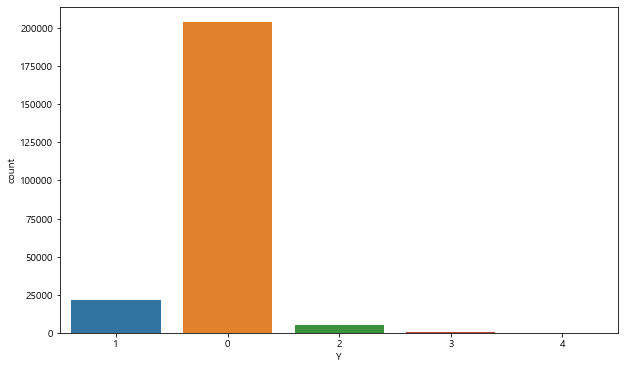

In [6]:
df['Y'] = df['Y'].astype(str)
df['Y'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(x='Y', data=df)

0의 비율이 1,2,3의 비율보다 눈에 띄게 높아서 1,2,3을 1이라는 값으로 통합하여 변환하였다.

<AxesSubplot:xlabel='Y_new', ylabel='count'>

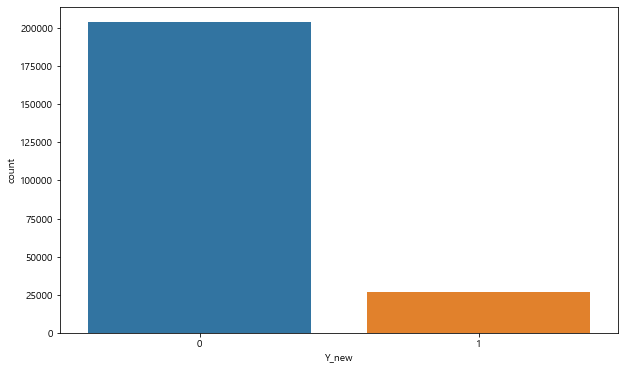

In [7]:
def func(row):
    if row != '0':
        return 1
    else:
        return 0
    
df['Y_new'] = df['Y'].apply(func)

plt.figure(figsize=(10, 6))
sns.countplot(x='Y_new', data=df)

# 근무자 파생변수 생성

- 6 ~ 14 : day 근무자
- 14 ~ 22 : Evening 근무자
- 22 ~ 6 : Night 근무자

In [8]:
df['datetime_1'] = pd.to_datetime(df['Datetime'])
df['datetime_ho'] = df['datetime_1'].dt.hour

def date_time(row):
    if 6 <= row < 14:
        return 'day'
    elif 14 <= row < 22:
        return 'Evening'
    else : 
        return 'Night'
    
df['근무조'] = df['datetime_ho'].apply(date_time)
df['근무조'].value_counts()

Evening    104662
Night       76344
day         49833
Name: 근무조, dtype: int64

# 카이제곱검정(근무조, Y)

- 귀무가설 : 근무조와 이상치간에 차이가 없다
- 대립가설 : 근무조와 이상치간에 차이가 있다.
    
- 결론 : 유의수준 5% 하에서 유의확률이 0이기 때문에 귀무가설을 기각하고, 대립가설을 채택한다.
- 즉, 근무조와 이상치간에 차이가 있다고 할 수 있다.

In [9]:
df1 =pd.crosstab(df['Y_new'], df['근무조'])
chi, pval, dof, expected = stats.chi2_contingency(df1)

print('chi-square test')
print('chisq : {0:0.3f}'.format(chi))
print('p : {0:0.7f}'.format(pval))
print('degree of freedom : {}'.format(dof))
print('expected value : \n{}'.format(expected.round(3)))

chi-square test
chisq : 13466.641
p : 0.0000000
degree of freedom : 2
expected value : 
[[92417.527 67412.467 44003.006]
 [12244.473  8931.533  5829.994]]


# 근무자와 Y 100% 누적막대그래프

- 이상신호에서는 Night 시간대에 확 많아지는 것을 확인 할 수 있다.
- 이상신호에서는 day 시간대에 많아지는 것을 확인 할 수 있다.
- 이상신호에서는 evening 시간대에 적어지는 것을 확인 할 수 있다.

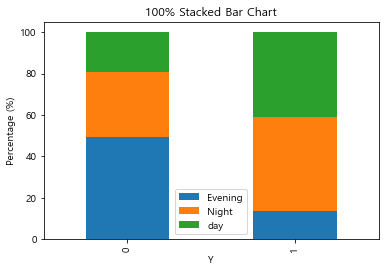

<Figure size 720x720 with 0 Axes>

In [10]:
df1['Total'] = df1.sum(axis=1)
# Normalize each group to sum up to 100%
for col in ['Evening', 'Night', 'day']:
    df1[col] = df1[col] / df1['Total'] * 100

df_group_100 = df1.drop('Total', axis=1)
df_group_100.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Y')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()

# Show the plot
plt.show()

# 카이제곱검정(공정배치그룹, Y)

- 귀무가설 : 공정배치 그룹과 이상치간에 차이가 없다
- 대립가설 : 공정배치 그룹과 이상치간에 차이가 있다.
    
- 결론 : 유의수준 5% 하에서 유의확률이 0이기 때문에 귀무가설을 기각하고, 대립가설을 채택한다.
- 즉, 공정배치 그룹과 이상치간에 차이가 있다고 할 수 있다.

In [11]:
df_2 = pd.crosstab(df['Code_Num'], df['Y_new']).T

chi, pval, dof, expected = stats.chi2_contingency(df_2)
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(pval))
print("degree pf freedom:{}".format(dof))
print("expected value: \n{}".format(expected.round(3)))

chi-square test
chisq: 14856.759
p: 0.000
degree pf freedom:6
expected value: 
[[47835.267 42794.166 27579.032 46350.045  5488.786 22697.756 11087.949]
 [ 6337.733  5669.834  3653.968  6140.955   727.214  3007.244  1469.051]]


# 근무자와 Y 100% 누적막대그래프

- 이상신호에서는 GROUP-G에서 가장 많아지는 것을 확인 할 수 있다.
- 이상신호에서는 GROUP-D에서 가장 적어지는 것을 확인 할 수 있다.

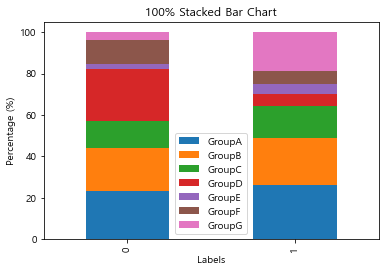

<Figure size 720x720 with 0 Axes>

In [12]:
df_2['Total'] = df_2.sum(axis=1)
# Normalize each group to sum up to 100%
for col in ['GroupA','GroupB','GroupC','GroupD','GroupE','GroupF','GroupG']:
    df_2[col] = df_2[col] / df_2['Total'] * 100
df_group_100 = df_2.drop('Total', axis=1)
df_group_100.plot(kind='bar', stacked=True)


# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Percentage (%)')
plt.title('100% Stacked Bar Chart')
plt.legend()

# Show the plot
plt.show()